## manualSNAC

An Ipython notebook to manually explore simultaneous nitrogen aggregation and cooling

In [1]:
# import diamond.Diamond and SNACmodel.AggregationModel
from snac.diamond import Diamond
from snac.SNACmodel import AggregationModel

### 1) Diamond parameters

In [2]:
# ages in Ma:
age_core = 3520
age_rim = 1860
age_kimberlite = 0

# Nitrogen data (total N concentration in ppm and proportion of B-centres 0-1):
# core:
c_NT = 625
c_agg = 0.863

# rim:
r_NT = 801
r_agg = 0.197

# create Diamond instance
diamond = Diamond(
    age_core=age_core,
    age_rim=age_rim,
    age_kimberlite=age_kimberlite,
    c_NT=c_NT,
    c_agg=c_agg,
    r_NT=r_NT,
    r_agg=r_agg,
    )

print(diamond)

Diamond with
- core age 3520 Ma,
- rim age 1860 Ma,
- kimberlite age 0 Ma.
- Core: [N_T] 625 ppm, 86.3%B.
- Rim: [N_T] 801 ppm, 19.7%B.


### 2) Model parameters

In [3]:
# time step in Myr, e.g. 1 Myr
dt = 1

# guess for starting temperature (deg.C) and cooling rate (K/Myr):
cooling_rate0 = 0.052
T_start0 = 1216

### 3) Create model

In [4]:
# create aggregation model instance
model = AggregationModel(
    diamond=diamond,
    cooling_rate0=cooling_rate0,
    T_start0=T_start0,
    dt=dt,
)


### 4) Plot and compare aggregation histroy

In [5]:
# optional: print original model for comparison
print(model)

history = model.get_history()

# aggregation state after manual aggregation and cooling:
NA_core = history['NA_core'][-1]
NA_rim = history['NA_rim'][-1]
NB_core = history['NB_core'][-1]
NB_rim = history['NB_rim'][-1]

print('\nManual aggregation results:')
print(f'Core: NA = {NA_core:.0f}, NB = {NB_core:.0f} -> %B = {NB_core/(NA_core+NB_core)*100:.1f}%')
print(f'Rim:  NA = {NA_rim:.0f}, NB = {NB_rim:.0f} -> %B = {NB_rim/(NA_rim+NB_rim)*100:.1f}%')

AggregationModel:
for Diamond with
- core age 3520 Ma,
- rim age 1860 Ma,
- kimberlite age 0 Ma.
- Core: [N_T] 625 ppm, 86.3%B.
- Rim: [N_T] 801 ppm, 19.7%B.

Cooling scenario: continuous
- with additional parameters: None
Initial guesses:
- Starting: 1216 deg.C
- Cooling rate: 52.0 K/Gyr

Manual aggregation results:
Core: NA = 86, NB = 539 -> %B = 86.2%
Rim:  NA = 643, NB = 158 -> %B = 19.7%


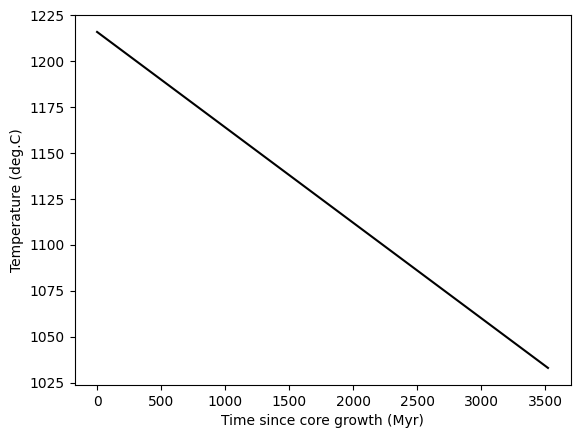

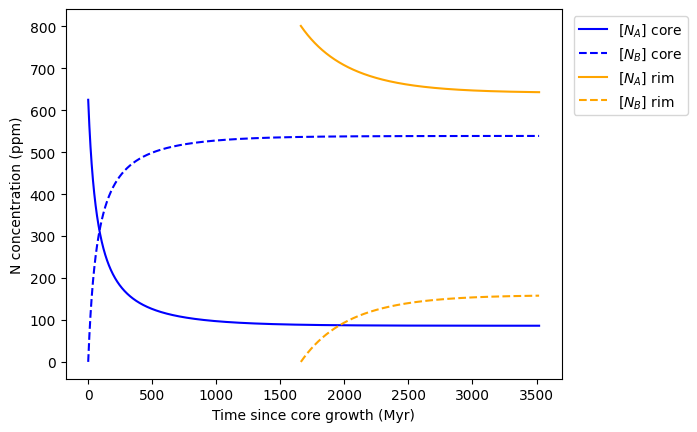

In [6]:
# plot results
model.plot_T_history()
model.plot_aggregation_history(rim_start=True)